# Questions

1. Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de
sa masse volumique $\rho$, et calculer ne pour l’eau (liquide) et l’os compact (définition de l'ICRU).
On s’appuiera sur les données du [NIST](https://physics.nist.gov/cgi-bin/Star/compos.pl?ap) pour les compositions atomiques de ces matériaux.

$$n_e = \frac{\rho}{m_u} \sum_i \left( \frac{Z_i}{A_i} \right) w_i$$

où:
- $\rho$ est la masse volumique du matériau (en kg/$\text{m}^3$)
- blabla

In [3]:
def n_e(rho, Zs, As, ws):
    return rho / 1.660539066e-27 * sum([Z/A*w for Z, A, w in zip(Zs, As, ws)])

# Eau liquide
n_e_liquid_water = n_e(1.0, [1, 8], [1.0080, 15.999], [0.111894, 0.888106])
print(f"Eau liquide : {n_e_liquid_water} m^-3")

# Os
n_e_compact_bone = n_e(
    1.85, [1, 6, 7, 8, 12, 15, 16, 20],
    [1.008, 12.011, 14.007, 15.999, 24.305, 30.973762, 32.07, 40.08],
    [0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
print(f"Os compact : {n_e_compact_bone} m^-3")

Eau liquide : 3.3428102885002694e+26 m^-3
Os compact : 5.905836255954329e+26 m^-3


2. Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de
l’énergie cinétique (T). Pour expliciter la dépendance en $T$ de $S_{\text{col}}$, utilisez les relations 9 et
10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les
énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

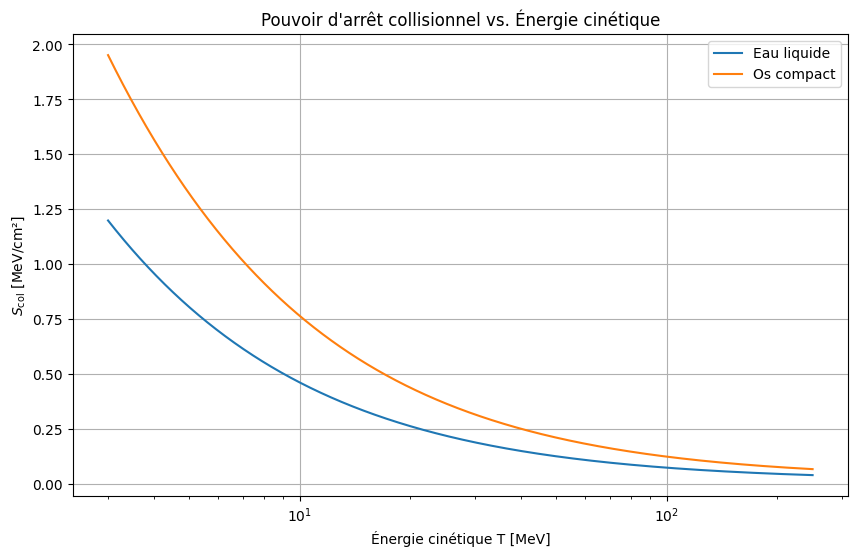

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes physiques en SI
r_e = 2.8179403227e-15  # m
m_e = 9.1093837139e-31  # kg
m_p = 1.67262192595e-27  # kg
c = 3e8  # m/s
J_in_eV = 1.602176634e-19  # J/eV

def gamma(T):
    """Facteur relativiste γ"""
    return T / (m_p*c**2) + 1

def beta_squared(T):
    """β² calculé directement"""
    g = gamma(T)
    return (g**2 - 1) / g**2

def T_e_max(T):
    """Énergie maximale transférable en J"""
    g = gamma(T)
    return 2 * m_e * c**2 * (g**2 - 1) / (1 + 2 * g * m_e/m_p + (m_e/m_p)**2)

def S_col(T, n_e, I):
    """Pouvoir d'arrêt collisionnel en J/m²"""
    b2 = beta_squared(T)
    g = gamma(T)
    
    term1 = 2*np.pi * r_e**2 * m_e * c**2 * n_e / b2
    term2 = np.log(2 * m_e * c**2 * b2 * g**2 * T_e_max(T) / I**2)
    term3 = 2*b2
    
    return term1 * (term2 - term3)

# Paramètres physiques
n_e_water = 3.343e29  # électrons/m³
n_e_bone = 5.906e29   # électrons/m³
I_water = 75 * J_in_eV  # J
I_bone = 106.4 * J_in_eV  # J

# Points d'énergie
T_MeV = np.linspace(3, 250, 10000)  # MeV
T_J = T_MeV * 1e6 * J_in_eV  # Conversion en Joules

# Calcul du pouvoir d'arrêt
S_water = S_col(T_J, n_e_water, I_water) / J_in_eV * 1e-4 / 1e6  # MeV/cm²
S_bone = S_col(T_J, n_e_bone, I_bone) / J_in_eV * 1e-4 / 1e6    # MeV/cm²

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(T_MeV, S_water, label="Eau liquide")
plt.plot(T_MeV, S_bone, label="Os compact")
plt.xscale("log")
plt.xlabel("Énergie cinétique T [MeV]")
plt.ylabel("$S_{\\text{col}}$ [MeV/cm²]")
plt.title("Pouvoir d'arrêt collisionnel vs. Énergie cinétique")
plt.legend()
plt.grid(True)
plt.show()

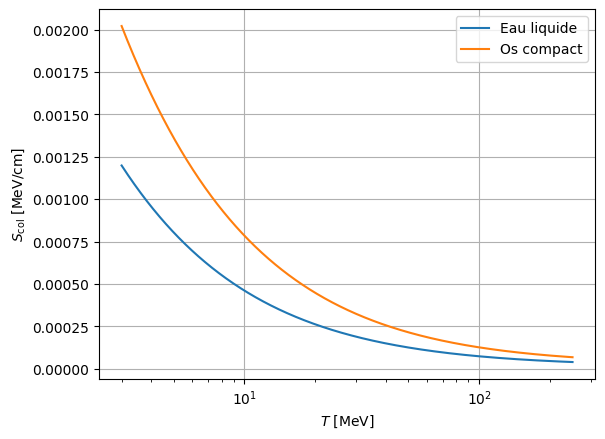

In [2]:
import matplotlib.pyplot as plt
import numpy as np

r_e = 2.8179403227e-15 # m
m_e = 9.1093837139e-31 # kg
m_p = 1.67262192595e-27 # kg
c = 3e8 # m/s
J_in_eV = 1.602176634e-19 # J/eV

def gamma(T):
    return T / (m_p*c**2) + 1

def beta_squared(T):
    return (gamma(T)**2 - 1) / gamma(T)**2

def T_e_max(T): # J
    return 2 * m_e * c**2 * (gamma(T)**2 - 1) / (1 + 2 * gamma(T) * m_e/m_p + (m_e/m_p)**2)

def S_col(T, n_e, I): # [J/m^2]
    term1 = 2*np.pi * r_e**2* m_e * c**2 * n_e / beta_squared(T)
    term2 = np.log(2 * m_e * c**2 * beta_squared(T) * gamma(T)**2 * T_e_max(T) / I**2)
    term3 = 2*beta_squared(T)

    return term1 * (term2 - term3)

kinetic_energy_ev = np.linspace(3e6, 250e6, 10000) # eV
S_col_water = S_col(kinetic_energy_ev*J_in_eV, n_e_liquid_water, 75*J_in_eV) / J_in_eV * 1e-4 / 1e6 # [MeV/cm^2]
S_col_bone = S_col(kinetic_energy_ev*J_in_eV, n_e_compact_bone, 91.9*J_in_eV) / J_in_eV * 1e-4 / 1e6 # [MeV/cm^2]

plt.figure()
plt.plot(kinetic_energy_ev / 1e6, S_col_water, label="Eau liquide")
plt.plot(kinetic_energy_ev / 1e6, S_col_bone, label="Os compact")
plt.xscale("log")
plt.xlabel("$T$ [MeV]")
plt.ylabel("$S_{\\text{col}}$ [MeV/cm]")
plt.legend()
plt.grid()


# Portée des protons dans la matière

3. En quoi la seule considération des interactions des protons avec les électrons du milieu est-elle justifiée ? Appuyez votre réponse en comparant les contributions des interactions nucléaires (protons avec noyaux atomiques du milieu) et radiatives (pertes d’énergie par _Bremsstrahlung_) au pouvoir d’arrêt total sur la plage 3-250 MeV. Les données PSTAR et un graphique pourraient être utiles

Text(0.5, 1.0, 'Os compact')

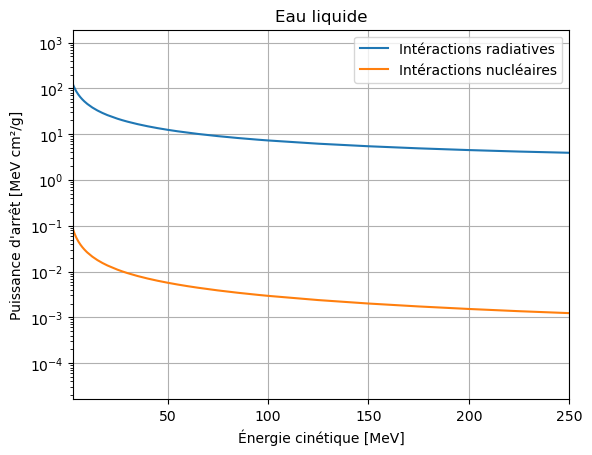

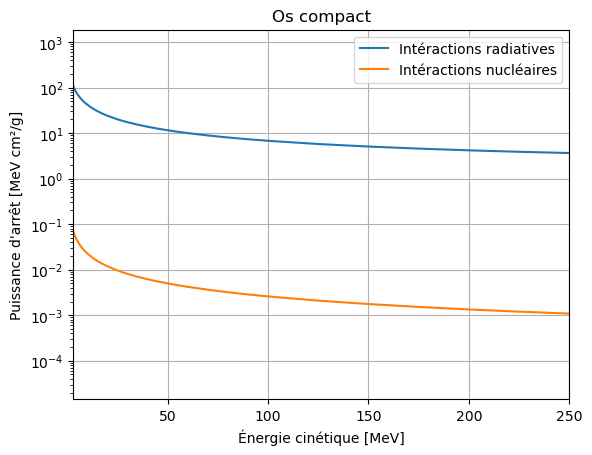

In [16]:
# Colonnes : Énergie cinétique [MeV], Puissance d'arrêt électron [MeV cm^2/g], Puissance d'arrêt nucléaire [MeV cm^2/g], 
water_liquid_data = np.loadtxt("data/water_liquid_apdata.pl", skiprows=8)
bone_data = np.loadtxt("data/bone_apdata.pl", skiprows=8)

plt.figure()
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 1], label="Intéractions radiatives")
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Eau liquide")

plt.figure()
plt.plot(bone_data[:, 0], bone_data[:, 1], label="Intéractions radiatives")
plt.plot(bone_data[:, 0], bone_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Os compact")

Les graphiques ci-dessus montrent que la contribution des intéractions nucléaires est inférieure par 3 ordres de grandeur par rapport à celle des électrons. Donc, il est raisonnable de négliger la contribution des intéractions nucléaires.

4. Pourquoi intègre-t-on l’inverse du pouvoir d’arrêt pour déterminer la portée ?

Les unités de $S_{\text{col}}$ sont [MeV/cm]. Ainsi, en intégrant l'inverse de $S_\text{col}$ par rapport à l'énergie, on obtient des cm et donc une longueur.